<h1 style="text-align:center;">T tests</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<p>Typically the goal is to compare to groups, usually the mean.</p>

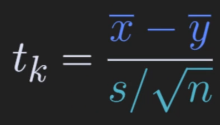
k is the degrees of freedom. In case of k=n-1 we subtract the H0 mean value.
s is sample standard deviation
n is number of data points
<p>Difference of means divided by standard deviation.</p>

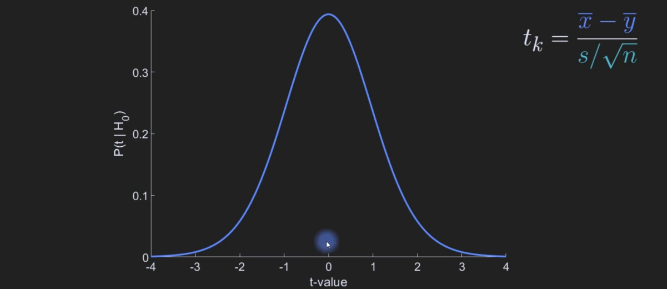

<p>Probability of t values given H0 is true</p>

<h1 style="text-align:center;">One sample T tests</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<p>Test whether a sample could have been drawn from a distribution with a specified mean.</p>
<p>T tests should be used on interval and ratio data, discreet numeric data can be okay too.</p>
<p>We assume the data to be independent from each other and the data is randomly drawn from the dataset.</p>

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

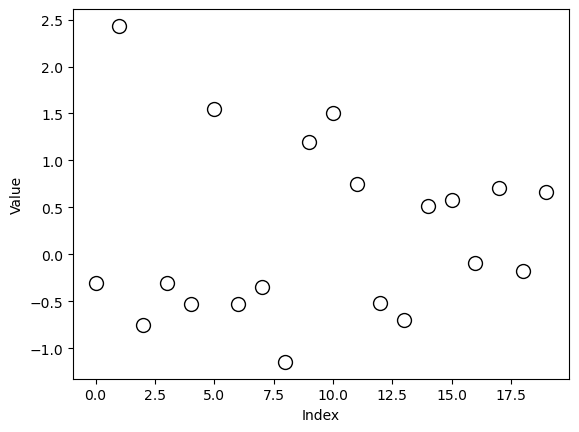

In [92]:
N = 20
populationMean = 0.5
data = np.random.randn(N) + populationMean

plt.plot(data,'ko',markerfacecolor='w',markersize=10)
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

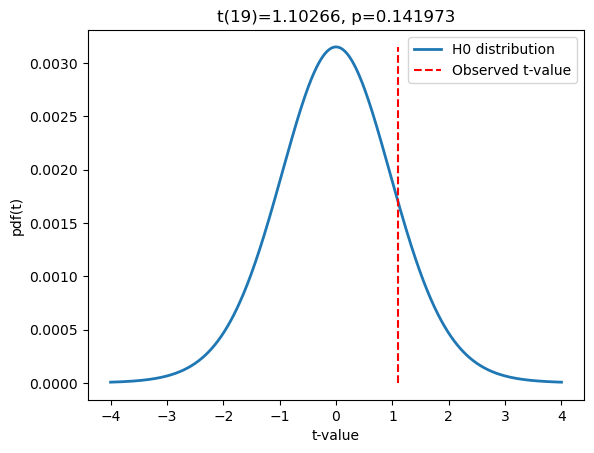

We do not have sufficient evidence to reject H0.


In [102]:
# T testing manually
H0value = 0
t_numerator   = np.mean(data) - H0value
t_denominator = np.std(data) / np.sqrt(N)
t_value       = t_numerator / t_denominator

df = N - 1

# p-value
p = 1 - stats.t.cdf(abs(t_value),df)

x = np.linspace(-4,4,1001)
t_dist = stats.t.pdf(x,df) * np.mean(np.diff(x))

plt.plot(x,t_dist,linewidth=2)
plt.plot([t_value,t_value],[0,max(t_dist)],'r--')
plt.legend(('H0 distribution','Observed t-value'))
plt.xlabel('t-value')
plt.ylabel('pdf(t)')
plt.title('t(%g)=%g, p=%g'%(df,t_value,p))
plt.show()
print('We do not have sufficient evidence to reject H0.')
# What this test shows is that 

In [103]:
t,p = stats.ttest_1samp(data,H0value) # this is two-tailed and dof=N. 
print(f't={t},p={p}')

t=1.0747391140320521,p=0.29595108120784236


<h1 style="text-align:center;">Two sample T tests</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">